# Tutorial about Ripley's k function

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import locan as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Simulate data

We simulate localization data that is homogeneously Poisson distributed.

In [3]:
dat_random = sp.simulate_csr(n_samples=1000, feature_range=(0,1000), seed=1)

print('Data head:')
print(dat_random.data.head(), '\n')
print('Summary:')
dat_random.print_summary()
print('Properties:')
print(dat_random.properties)

Data head:
   position_x  position_y
0  417.022005  720.324493
1    0.114375  302.332573
2  146.755891   92.338595
3  186.260211  345.560727
4  396.767474  538.816734 

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-04 13:46:11 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 1000
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""

Properties:
{'localization_count': 1000, 'position_x': 499.56214528993655, 'position_y': 519.1548446296586, 'region_measure_bb': 996059.0522922891, 'localization_density_bb': 0.0010039565402258444, 'subregion_measure_bb': 3992.110610770361}


We also simulate data that follows a Neyman-Scott distribution (blobs): 

In [4]:
dat_blob = sp.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=1)

print('Data head:')
print(dat_blob.data.head(), '\n')
print('Summary:')
dat_blob.print_summary()
print('Properties:')
print(dat_blob.properties)

Data head:
   position_x  position_y  cluster_label
0  209.225274  875.716741              6
1  144.266150  212.796366              9
2  435.426573  553.514930              8
3  386.088708  538.049940              4
4  409.730292  555.063369              8 

Summary:
identifier: "2"
comment: ""
creation_date: "2021-03-04 13:46:11 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 1000
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""

Properties:
{'localization_count': 1000, 'position_x': 235.91469870841306, 'position_y': 499.3365015926777, 'region_measure_bb': 397093.37595473387, 'localization_density_bb': 0.0025182993737825374, 'subregion_measure_bb': 2625.5609705102383}


### Scatter plot

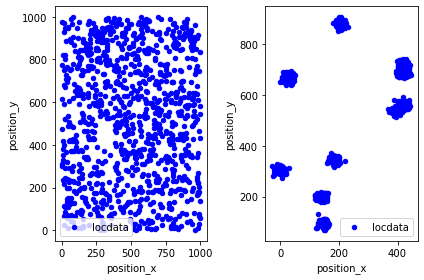

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dat_random.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
dat_blob.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout()
plt.show()

## Analyze Ripley's h function

We have a look at the Ripley's h function from all localizations in locdata. 

The analysis class Ripley_h_function provides numerical results, and a plot of results versus radii.

In [6]:
rhf_random = sp.RipleysHFunction(radii=np.linspace(0, 200, 100))
rhf_random.compute(dat_random)
rhf_random.results.head()

,Ripley_h_data
radius,
0.000000,0.000000
2.020202,-0.640261
4.040404,-0.477412
6.060606,-0.045583
8.080808,-0.356425


In [7]:
rhf_blob = sp.RipleysHFunction(radii=np.linspace(0, 200, 100))
rhf_blob.compute(dat_blob)
rhf_blob.results.head()

,Ripley_h_data
radius,
0.000000,0.000000
2.020202,9.461929
4.040404,18.846593
6.060606,27.912376
8.080808,36.695519


The plot reflects the amount of clustering. For homogeneous distributed data it decreases towards negative values since edge effects are not taken into account.

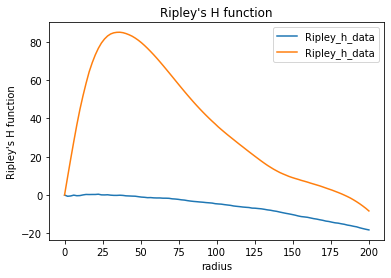

In [8]:
rhf_random.plot()
rhf_blob.plot();

## Estimate Ripley's h function

We can speed up the computation of an estimated Ripley's k function by providing a subset of the original localizations as test points.

We first take a random subset of the original localizations as test data. Here we provide 10 shuffeled data sets.  

In [9]:
from locan.data.filter import random_subset
subsets = [sp.random_subset(dat_blob, n_points=5) for i in range(10)]

We then compute the estimated Ripley's h function'

In [10]:
rhf_estimate = sp.RipleysHFunction(radii=np.linspace(0, 200, 100)).compute(dat_blob, other_locdata=subsets[0])

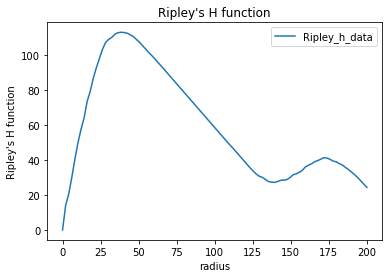

In [11]:
rhf_estimate.plot();

We can do the same for all subsets

In [12]:
rhf_estimates = [sp.RipleysHFunction(radii=np.linspace(0, 200, 100)).compute(dat_blob, other_locdata=subset) for subset in subsets]

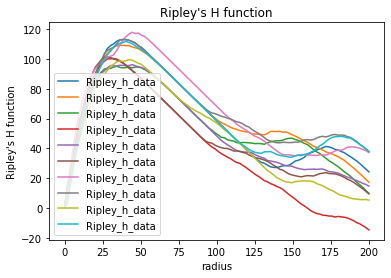

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for estimate in rhf_estimates:
    estimate.plot(ax=ax)
plt.show()

## Compute Ripley's k, l and h function

We can compute Ripley's k, l and h function

In [14]:
rkf_random = sp.RipleysKFunction(radii=np.linspace(0, 200, 100)).compute(dat_random)
rlf_random = sp.RipleysLFunction(radii=np.linspace(0, 200, 100)).compute(dat_random)
rhf_random = sp.RipleysHFunction(radii=np.linspace(0, 200, 100)).compute(dat_random)

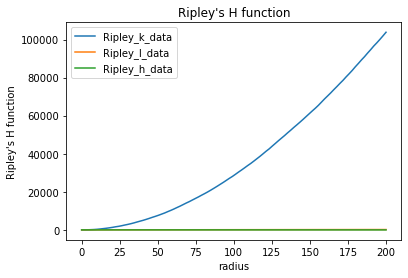

In [15]:
rkf_random.plot()
rlf_random.plot()
rhf_random.plot();

## Estimate Ripley's h function for 3D data

In [16]:
dat_blob_3D = sp.simulate_Thomas(n_samples=10_000, n_features=3, centers=200, feature_range=(0, 10_000), cluster_std=50, seed=1)

In [17]:
sub = sp.random_subset(dat_blob_3D, n_points=1000)

In [18]:
rhf_3D = sp.RipleysHFunction(radii=np.linspace(0, 1000, 100)).compute(dat_blob_3D, other_locdata=sub)

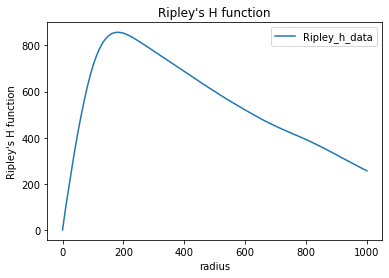

In [19]:
rhf_3D.plot();

## Find the maximum of Ripley's h function

In [20]:
rhf_blob = sp.RipleysHFunction(radii=np.linspace(0, 200, 100)).compute(dat_blob)

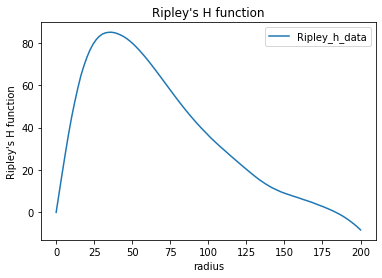

In [21]:
rhf_blob.plot();

In [22]:
rhf_blob.Ripley_h_maximum

,radius,Ripley_h_maximum
Ripley_h_data,36.363636,85.051818
